# The Median of Price(THB)/Area(sqm.) in Types of Buildings from 30000 data

# import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import matplotlib.pyplot as plt2

# import data

In [2]:
url='https://drive.google.com/file/d/1TNDpbbBAUShvpqzTzXqWdZ7qljn1119i/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
estimate = pd.read_csv(url)
data=estimate.loc[:, ['propertytype_name_en','area_usable_min','price_min']]
data=data.sort_values('propertytype_name_en',ascending=True).dropna()

# resetting index

In [3]:
reset=data.reset_index()

# list head data

In [4]:
_type=data.loc[:,['propertytype_name_en']]
_type=_type.values.tolist()
new_type = []
for New_type in _type:
    if New_type not in new_type:
        new_type.append(New_type)

# selecting data

In [5]:
def median_founder(data001):
    data001['area/thai bath']=data001['price_min']//data001['area_usable_min']
    data001['median'] = data001['area/thai bath'].median(axis=0)
    data001=data001.reset_index()
    data001.drop('index',axis=1)

# reset index name

In [6]:
reset=reset.drop_duplicates(subset=['propertytype_name_en'])

# drop column

In [7]:
reset=reset.reset_index().drop('level_0',axis= True).drop('index',axis= True)

# appending dataframe

In [8]:
i=0
data001 = data.query('propertytype_name_en == "'+str(reset['propertytype_name_en'][i])+'"')
median_founder(data001)
data001=data001.reset_index()
data001.drop('index',axis=1)
data001 = pd.DataFrame({'Building_type':data001['propertytype_name_en'][0],'Median':data001['median'][0]},index=[int(i)])
data001=pd.DataFrame(data001)

C:\Users\atpho\AppData\Local\Temp\ipykernel_20304\3921874263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data001['area/thai bath']=data001['price_min']//data001['area_usable_min']
C:\Users\atpho\AppData\Local\Temp\ipykernel_20304\3921874263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data001['median'] = data001['area/thai bath'].median(axis=0)


In [9]:
n=1
for n in range(1,len(new_type)):
    data002 = data.query('propertytype_name_en == "'+str(reset['propertytype_name_en'][n])+'"')
    median_founder(data002)
    data002=data002.reset_index()
    data002.drop('index',axis=1)
    data002 = pd.DataFrame({'Building_type':data002['propertytype_name_en'][0],'Median':data002['median'][0]},index=[int(n)])
    data001=pd.concat([data001,data002])

C:\Users\atpho\AppData\Local\Temp\ipykernel_20304\3921874263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data001['area/thai bath']=data001['price_min']//data001['area_usable_min']
C:\Users\atpho\AppData\Local\Temp\ipykernel_20304\3921874263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data001['median'] = data001['area/thai bath'].median(axis=0)
C:\Users\atpho\AppData\Local\Temp\ipykernel_20304\3921874263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

# sort value data

In [10]:
data001 = data001.sort_values('Median',ascending=True)
data001 = data001.reset_index().drop('index',axis=1)

# ploting graph

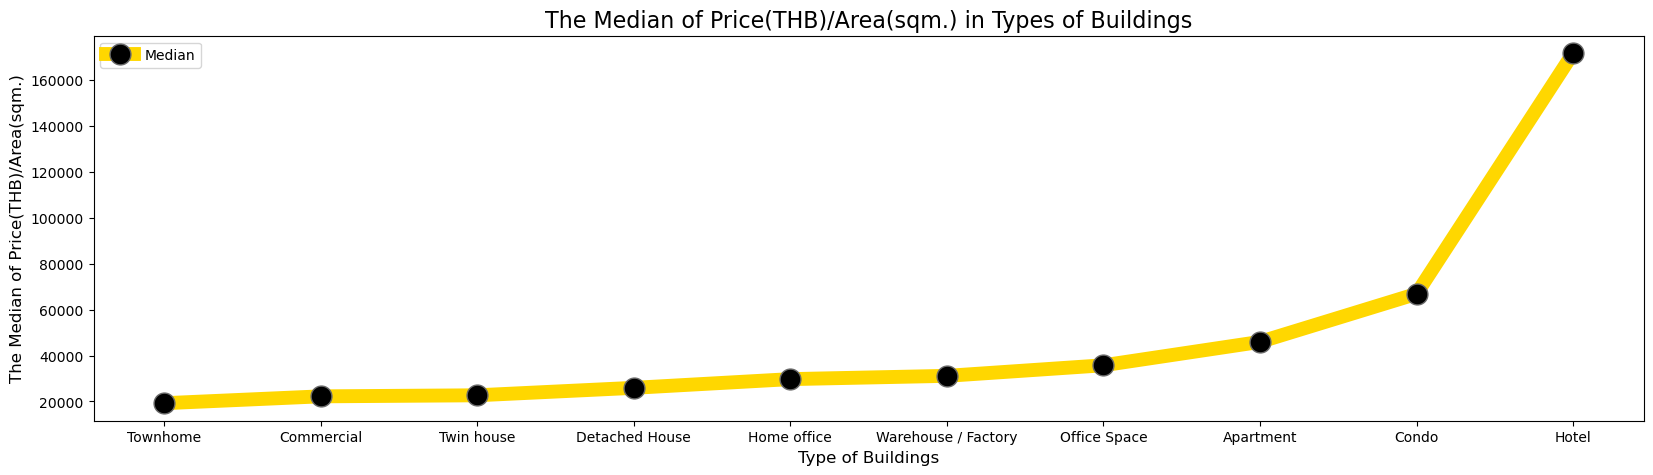

In [11]:
data001.plot(x='Building_type',y='Median',figsize=(20,5),color='gold',linewidth=10,marker='o',ms=15,mec='dimgrey',mfc='black')
plt.xticks(data001.index,data001['Building_type'])
plt.title('The Median of Price(THB)/Area(sqm.) in Types of Buildings',fontsize=16)
plt.xlabel('Type of Buildings',fontsize=12)
plt.ylabel('The Median of Price(THB)/Area(sqm.)',fontsize=12)
plt.show()

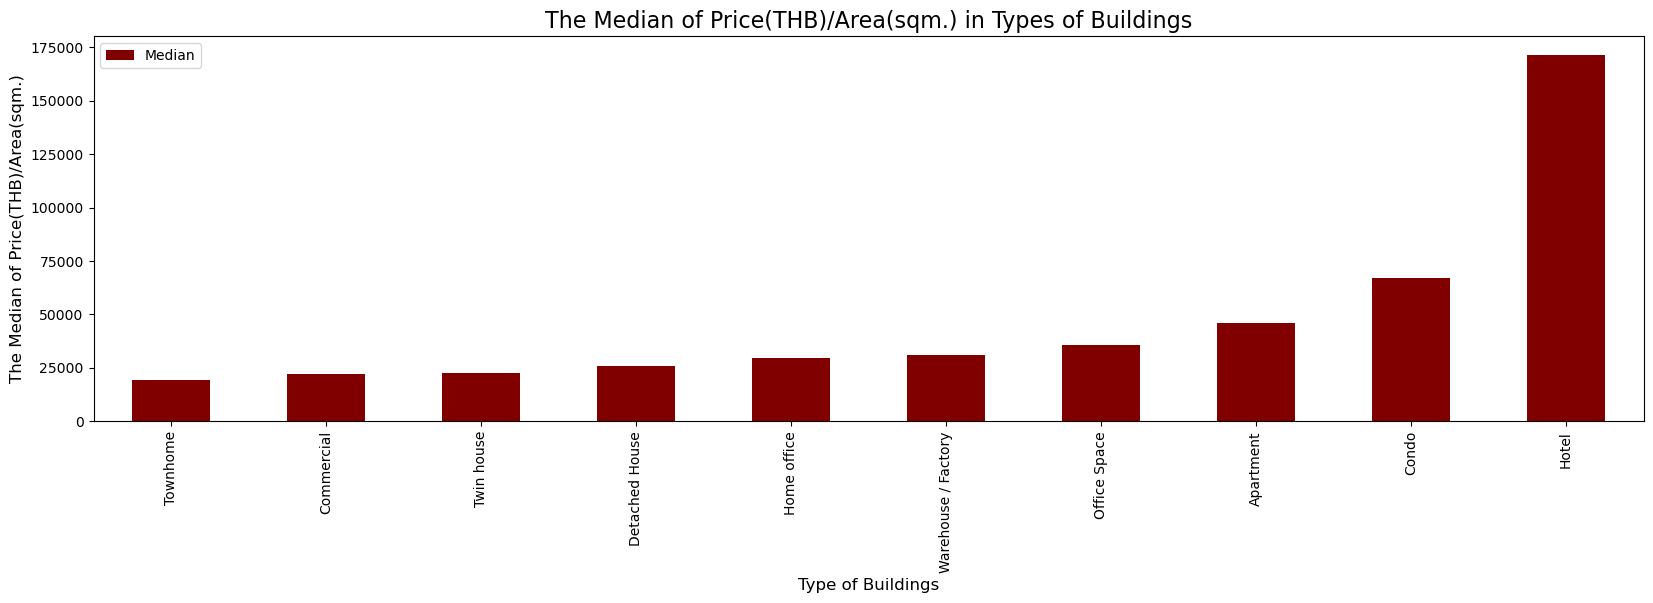

In [12]:
data001.plot.bar(x='Building_type',y='Median',color ='maroon',figsize=(20,5))
plt.xticks(data001.index,data001['Building_type'])
plt.title('The Median of Price(THB)/Area(sqm.) in Types of Buildings',fontsize=16)
plt.xlabel('Type of Buildings',fontsize=12)
plt.ylabel('The Median of Price(THB)/Area(sqm.)',fontsize=12)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

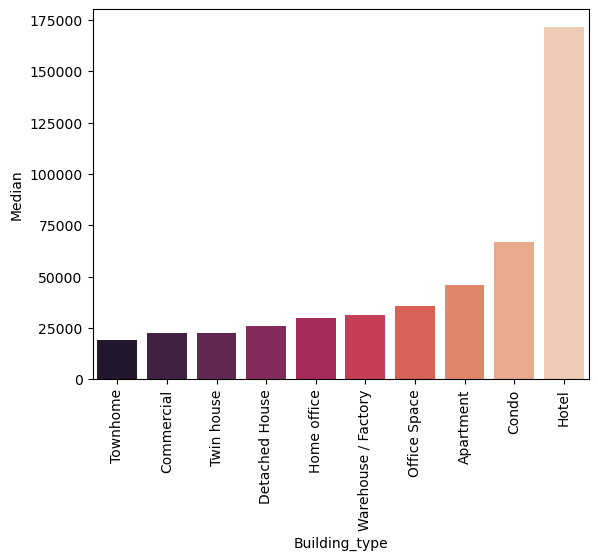

In [15]:
median_seaborn=sns.barplot(x='Building_type',y='Median',data=data001,palette="rocket")
median_seaborn.set_xticklabels(median_seaborn.get_xticklabels(), rotation=90)
plt.show

In [14]:
data001

,Building_type,Median
0,Townhome,19230.0
1,Commercial,22222.0
2,Twin house,22681.5
3,Detached House,25929.0
4,Home office,29719.0
5,Warehouse / Factory,31148.0
6,Office Space,35742.5
7,Apartment,45927.5
8,Condo,66837.5
9,Hotel,171589.0
